<h1> Module 10 Submission </h1>
<h2> Machine Learning and Data Mining</h2>
<h3 style="margin-top: 10px;" > Stephen Eades </h3>

<p> 7/20/2020 </p>

<h4> Polynomial Feature Selection </h4>

<p>In this module, you will write one Python notebooks to create required outputs. 
    <br>
    <br>

<ol>
    <li>Watch the lecture videos and fully understand the lecture notebook</li>
    <li>Analyze the “poly_data” data set by following the example in the lecture</li>
    <li>Add code in the assignment template and generate required outputs</li>
    <br>
</ol>

<strong>Submission:</strong> You will export your notebook to both .html and .py formats. You will submit the following file to Blackboard. In your html file, you should include only required outputs of your python script without error messages.

<ol>
    <li> Firstname_Lastname_polymodel_selection.zip (zip the .html and .ipynb files) </li>
</ol>

<strong>Attachments:</strong> 

<ol>
    <li>Model_evaluation_lecture.ipynb: the notebook from the lecture</li>
    <li>Polynomial_feature_selection_assignment_template.ipynb: the assignment template</li>
    <li>Poly_data.csvPreview the document: the data set</li>
    <li>Assignment 10.pdfPreview the document</li>
</ol>

In [1]:
# Import packages
import time
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import pandas as pd
%matplotlib inline

In [3]:
#Read in data from a data file to data_df in DateFrame format
csv = pd.read_csv("poly_data.csv")
data_df= pd.DataFrame(csv)

#verify the dataframe is imported correctly 
print(data_df.head(6))

   Unnamed: 0        X1         X2            y
0           0  1.764052  33.328661  1598.229564
1           1  0.400157   1.183124  -626.277403
2           2  0.978738  27.434845   417.084623
3           3  2.240893  11.530311   113.742012
4           4  1.867558  29.672567  1266.834421
5           5 -0.977278  38.525353   684.595541


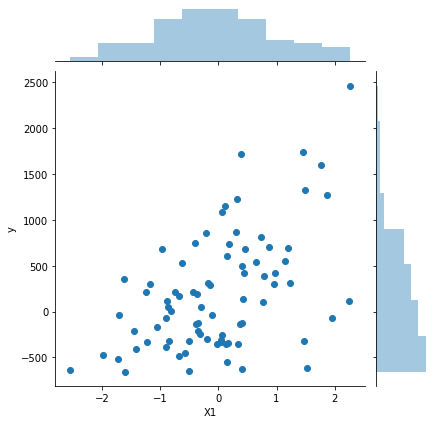

In [7]:
#joint plot (or scatter plot) of X1 and y
sns.jointplot(data_df['X1'], data_df['y'])

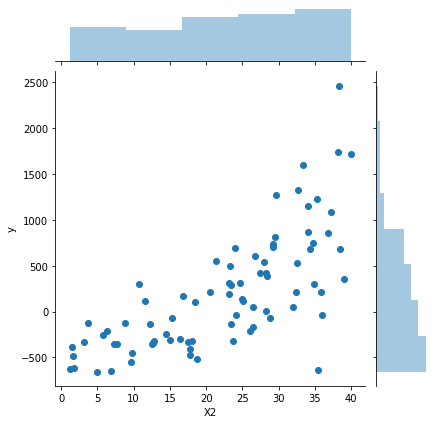

In [8]:
#joint plot (or scatter plot) of X2 and y
sns.jointplot(data_df['X2'], data_df['y'])

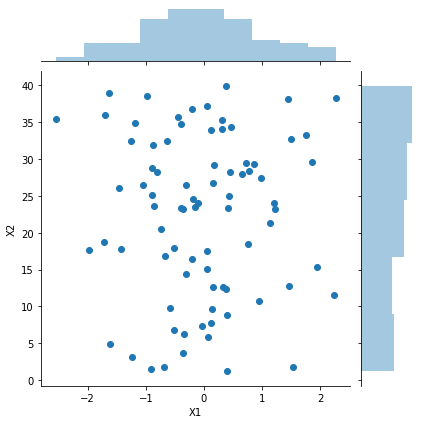

In [9]:
#joint plot (or scatter plot) of X1 and X2
sns.jointplot(data_df['X1'], data_df['X2'])

### Based on observing the above 3 diagrams and the p-values displayed, we found both X1 and X2 have close correlation with y. X1 and X2 are independent from each other. 

In [30]:
# split the data into training and testing datasets
# the percentage of training data is 75%

#split point 
percentage_for_training = 0.75

# Count training data
number_of_training_data = int(len(data_df)*percentage_for_training)

#create training and testing datasets
train_df  = data_df[0:number_of_training_data]
test_df = data_df[number_of_training_data:]
print(train_df.shape)
print(test_df.shape)

(60, 4)
(20, 4)


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#set the degree to 3, you can try a larger number if you like
#for degree = 3, we will generate 9 features. 
polynomial_features = PolynomialFeatures(degree=3)

In [32]:
X_poly = polynomial_features.fit_transform(data_df[['X1','X2']])

X_train = X_poly[0:number_of_training_data]
X_test = X_poly[number_of_training_data:]

In [33]:
# mse() calculates mean square error of a model on given X and y
def mse(X, y, model):
    return  ((y-model.predict(X))**2).sum()/y.shape[0]

In [34]:
# use all the features to train the linear model 
lm = LinearRegression()
lm.fit(X_train, train_df['y'])
train_mse = mse(X_train, train_df['y'], lm)
print("Training Data Set's MSE is: \t", train_mse)
test_mse = mse(X_test, test_df['y'], lm)
print("Testing Data Set's MSE is : \t", test_mse)

Training Data Set's MSE is: 	 34228.56230613586
Testing Data Set's MSE is : 	 43855.49584692776


In [35]:
#import lasso
#lasso is controlled by a parameter alpha.
#by fine tuning this parameter, we can control the number of features

from sklearn.linear_model import Lasso
#Train the model, try different alpha values.
Lasso_model = Lasso(alpha=0.15,normalize=True, max_iter=1e5, )
Lasso_model.fit(X_train, train_df['y'])
        

Lasso(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=100000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
#see the trained parameters. Zero means the feature can be removed from the model
Lasso_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  2.01175754e+01, -1.25276464e+01,
        4.22700925e+00,  0.00000000e+00,  1.29092616e+01, -0.00000000e+00,
        2.57442481e-01,  1.66306861e-02])

In [43]:
#let's see the train_mse and test_mse from Lasso when 
#alpha = 0.15

train_mse = mse(X_train, train_df['y'], Lasso_model)
print("Training Data Set's MSE is: \t", train_mse)
test_mse = mse(X_test, test_df['y'], Lasso_model)
print("Testing Data Set's MSE is : \t", test_mse)

Training Data Set's MSE is: 	 34475.943856232145
Testing Data Set's MSE is : 	 40452.12277027027


In [44]:
#let's try a large range of values for alpha first
#create 50 alphas from 100 to 0.00001 in logspace
alphas = np.logspace(2, -5, base=10, num=50)
alphas

array([1.00000000e+02, 7.19685673e+01, 5.17947468e+01, 3.72759372e+01,
       2.68269580e+01, 1.93069773e+01, 1.38949549e+01, 1.00000000e+01,
       7.19685673e+00, 5.17947468e+00, 3.72759372e+00, 2.68269580e+00,
       1.93069773e+00, 1.38949549e+00, 1.00000000e+00, 7.19685673e-01,
       5.17947468e-01, 3.72759372e-01, 2.68269580e-01, 1.93069773e-01,
       1.38949549e-01, 1.00000000e-01, 7.19685673e-02, 5.17947468e-02,
       3.72759372e-02, 2.68269580e-02, 1.93069773e-02, 1.38949549e-02,
       1.00000000e-02, 7.19685673e-03, 5.17947468e-03, 3.72759372e-03,
       2.68269580e-03, 1.93069773e-03, 1.38949549e-03, 1.00000000e-03,
       7.19685673e-04, 5.17947468e-04, 3.72759372e-04, 2.68269580e-04,
       1.93069773e-04, 1.38949549e-04, 1.00000000e-04, 7.19685673e-05,
       5.17947468e-05, 3.72759372e-05, 2.68269580e-05, 1.93069773e-05,
       1.38949549e-05, 1.00000000e-05])

In [45]:
#use arrays to keep track of the MSE of each alpha used. 
train_mse_array =[]
test_mse_array=[]

#try each alpha
for alpha in alphas:
    
    #create Lasso model using alpha
    Lasso_model = Lasso(alpha=alpha,normalize=True, max_iter=1e5, )
    Lasso_model.fit(X_train, train_df['y'])
    
    #Calculate MSEs of train and test datasets 
    train_mse = mse(X_train, train_df['y'], Lasso_model)
    test_mse = mse(X_test, test_df['y'], Lasso_model)
    
    #add the MSEs to the arrays
    train_mse_array.append(train_mse)
    test_mse_array.append(test_mse)
    

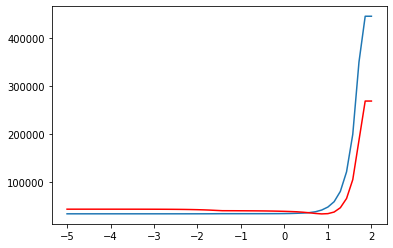

In [46]:
#plot the MSEs based on alpha values
#blue line is for training data
#red line is for the testing data
plt.plot(np.log10(alphas), train_mse_array)
plt.plot(np.log10(alphas), test_mse_array, color='r')

### There is something interesting between 0 and 1 in the above diagram. 0 mean 10^0=1 While 1 means 10^1 = 10  so, we will look closely within this range to find the optimal alpha value


The optimal alpha is:  [3.55855856]
Train MSE is:  48347.943216117455
Test MSE is:  34593.52285633148


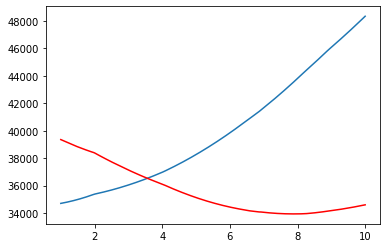

In [93]:
# We can try a smaller search space now (a line space between 1 and 10)
alphas = np.linspace(1, 10, 1000)
train_mse_array =[]
test_mse_array=[]

for alpha in alphas:
    
    Lasso_model = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
    Lasso_model.fit(X_train, train_df['y'])
                    
    train_mse = mse(X_train, train_df['y'], Lasso_model)
    test_mse = mse(X_test, test_df['y'], Lasso_model)
                    
    train_mse_array.append(train_mse)
    test_mse_array.append(test_mse)
    
# Find closest distance possible between train and test
train = np.array(train_mse_array)
test = np.array(test_mse_array)
value = abs(train-test)
minimum = np.min(value)

# Find the index where they are closest, this gives us alpha
index = np.where(value==minimum)

plt.plot(alphas, train_mse_array)
plt.plot(alphas, test_mse_array, color='r')

print("The optimal alpha is: ", alphas[index])
print("Train MSE is: ", train_mse_array[index])
print("Test MSE is: ", test_mse_array[index])

### By observing a smaller range of alpha, we can clearly see how the MSEs change as we change the model and features. Use the diagram to explain the trends of the two lines and summarize what you learned so far. 

In [94]:
## type your code here to describe the above diagram and what you learned 
## so far about feature and model selection ( about 200 words )
############################################################################
print("First, to describe the diagram above we see that as alpha increases, our Train and Test MSE converge until alpha "
     + "reaches the its optimal value of ~3.5586. At this point we see our Train and Test MSE overlap as they begin to "
     + "separate. Our Train MSE continues upwards with an increasing slope, while the Test MSE reaches down to ~34,000 where it "
     + "has the slope return to positive. What we find is that the features we choose have a major impact on the traning of our model. "
     + "we don't need two features that are highly correlated, as this is redundant, adds no benefit to the model, increases noise, and "
     + "could lead to our model being training on irrelevant data. Simplying our model to reduce the features and in turn the redundancy "
     + "means our model has less of a chance of being taught to make decisions based on noise. Plus less features is quicker computations! "
     + "Furthermore, we learned efficient ways to remove features that are highly correlated and unnecessary in the model. Using heatmaps and "
     + "matrixes allow us to quickly and visually identify what is 'out of place' so it can be dropped from our data.")
#############################################################################


First, to describe the diagram above we see that as alpha increases, our Train and Test MSE converge until alpha reaches the its optimal value of ~3.5586. At this point we see our Train and Test MSE overlap as they begin to separate. Our Train MSE continues upwards with an increasing slope, while the Test MSE reaches down to ~34,000 where it has the slope return to positive. What we find is that the features we choose have a major impact on the traning of our model. we don't need two features that are highly correlated, as this is redundant, adds no benefit to the model, increases noise, and could lead to our model being training on irrelevant data. Simplying our model to reduce the features and in turn the redundancy means our model has less of a chance of being taught to make decisions based on noise. Plus less features is quicker computations! Furthermore, we learned efficient ways to remove features that are highly correlated and unnecessary in the model. Using heatmaps and matrixe